In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")

In [2]:
dir = r"/home/bruno/Documentos/mba_usp/arvores_redes_ensemble_models_2/Arquivos e scripts 27.06.23 - Atualizado/tips.csv"
df = pd.read_csv(dir).drop(columns="Unnamed: 0")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df["pct_tip"] = df.tip / df.total_bill
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


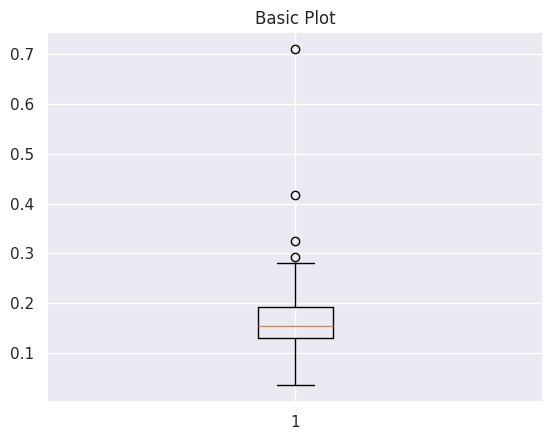

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.pct_tip);

In [47]:
def count_plot(df, eixo_x):
    return sns.countplot(df, x=eixo_x)

def bar_plot(df, eixo_x, eixo_y):
    # Criar um gráfico de barras com intervalo de confiança
    ax = sns.barplot(data=df, x=eixo_x, y=eixo_y,  errorbar="sd")
        
    return sns.pointplot(data=df, x=eixo_x, y=eixo_y, color="black", errorbar=None, estimator=lambda x: x.mean(), ax=ax)

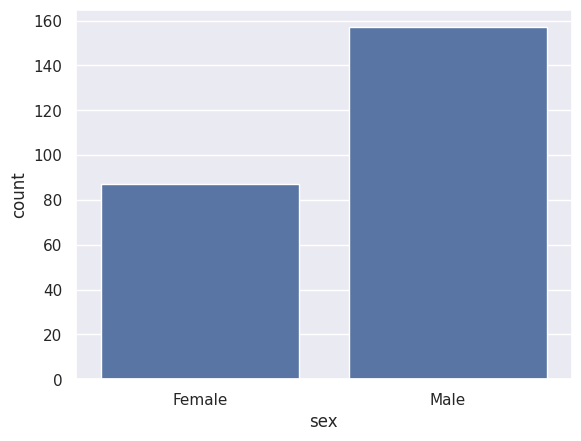

In [48]:
count_plot(df, "sex");

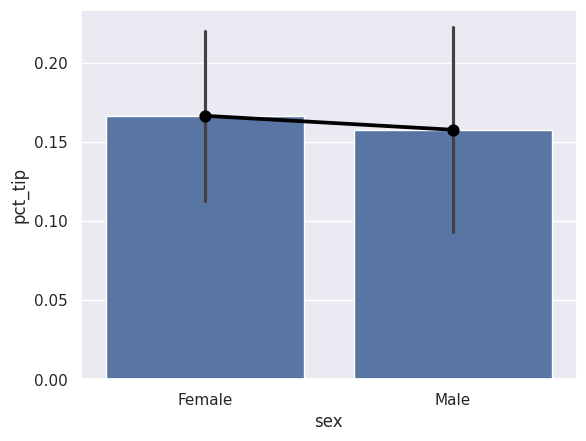

In [49]:
bar_plot(df, "sex", "pct_tip");

In [45]:
df[df["sex"] == "Male"]["pct_tip"].mean()

0.15765054700429743